# Automated Anomaly Detection
**Objective**: Understand and practice automated anomaly detection using various techniques.

**Task**: Anomaly Detection with Isolation Forest

**Steps**:
1. Data Set: Obtain a dataset of server response times.
2. Train Model: Use Isolation Forest to train a model on the response time data.
3. Detect Anomalies: Predict which response times are anomalies.
4. Evaluate Results: Assess the number of anomalies detected.

Detected 11 anomalies out of 510 data points.


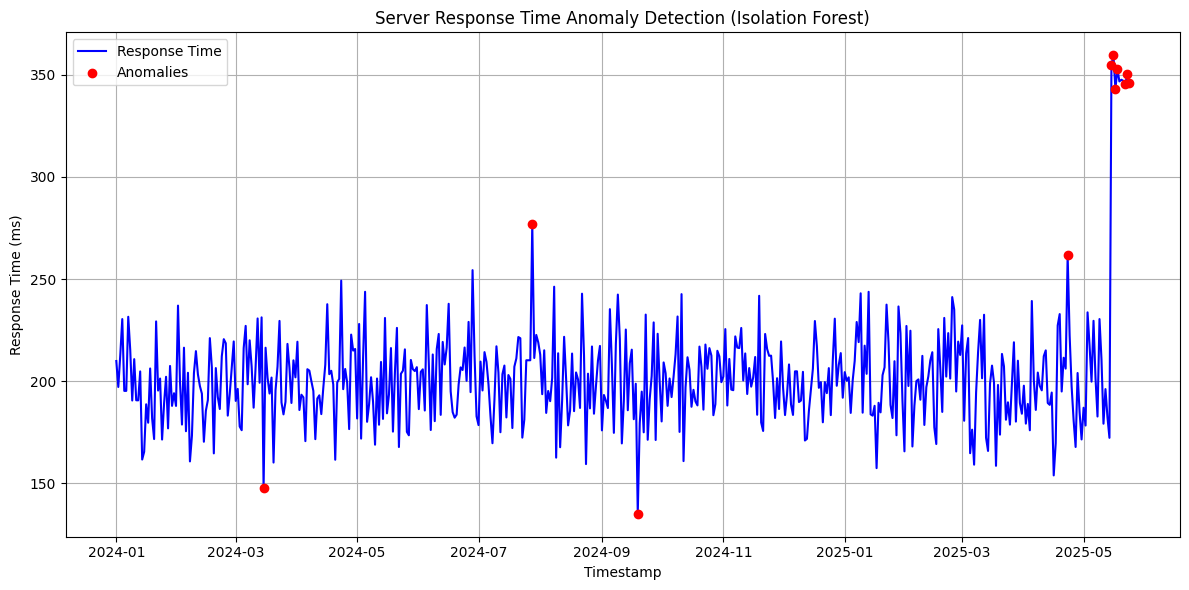

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
np.random.seed(42)
normal_data = np.random.normal(loc=200, scale=20, size=500)
anomalies = np.random.normal(loc=350, scale=5, size=10)  # Inject anomalies
response_times = np.concatenate([normal_data, anomalies])
dates = pd.date_range(start='2024-01-01', periods=len(response_times))

df = pd.DataFrame({'timestamp': dates, 'response_time': response_times})

scaler = StandardScaler()
df['scaled_response'] = scaler.fit_transform(df[['response_time']])

model = IsolationForest(contamination=0.02, random_state=42)
model.fit(df[['scaled_response']])

df['anomaly'] = model.predict(df[['scaled_response']])
df['anomaly'] = df['anomaly'].apply(lambda x: 1 if x == -1 else 0)

num_anomalies = df['anomaly'].sum()
print(f"Detected {num_anomalies} anomalies out of {len(df)} data points.")

plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['response_time'], label='Response Time', color='blue')
plt.scatter(df[df['anomaly'] == 1]['timestamp'],
            df[df['anomaly'] == 1]['response_time'],
            color='red', label='Anomalies', zorder=5)
plt.title("Server Response Time Anomaly Detection (Isolation Forest)")
plt.xlabel("Timestamp")
plt.ylabel("Response Time (ms)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

